<a href="https://colab.research.google.com/github/hasobi/dos-classification/blob/master/29Februari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats

import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

from scipy.stats import zscore

from sklearn.ensemble import ExtraTreesClassifier
import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import cross_validate, ShuffleSplit

from sklearn.model_selection import KFold

from sklearn.neural_network import MLPClassifier

from sklearn.externals import joblib 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


# Data Biasa / Original

In [0]:
df = pd.read_csv('/content/drive/My Drive/Tugas Akhir a.k.a SKRIPSI/Tugas Akhir - UPDATE JANUARI 2020/dataset/KDDTrain_Test.csv')

In [0]:
# dicitionary untuk merubah tipe serangan menjadi lebih umum seperti Normal, DoS, Probe, U2R, dan R2L

attack_dict={ #DOS
    'back' : 'dos',
    'land' : 'dos',
    'neptune' : 'dos',
    'pod' : 'dos',
    'smurf' : 'dos',
    'teardrop' : 'dos',
    'apache2' : 'dos',
    'udpstorm' : 'dos',
    'processtable' : 'dos',
    'worm' : 'dos',
    'mailbomb' : 'dos',
    
    #probe
    'satan' : 'probe',
    'ipsweep' : 'probe',
    'nmap' : 'probe',
    'portsweep' : 'probe',
    'mscan' : 'probe',
    'saint' : 'probe',
    
    #R2L
    'guess_passwd' : 'r2l',
    'ftp_write' : 'r2l',
    'imap' : 'r2l',
    'phf' : 'r2l',
    'multihop' : 'r2l',
    'warezmaster' : 'r2l',
    'warezclient' : 'r2l',
    'spy' : 'r2l',
    'xlock' : 'r2l',
    'xsnoop': 'r2l',
    'snmpguess' : 'r2l',
    'snmpgetattack' : 'r2l',
    'httptunnel' : 'r2l',
    'sendmail' : 'r2l',
    'named' : 'r2l',
    
    #U2R
    'buffer_overflow' : 'u2r',
    'loadmodule' : 'u2r',
    'rootkit' : 'u2r',
    'perl' : 'u2r',
    'sqlattack' : 'u2r',
    'xterm' : 'u2r',
    'ps' : 'u2r'
}

protocol_dict ={
    "udp" : 0,
    "tcp" : 1,
    "icmp": 2
}

service_dict={
    "Z39_50" : 0,
    "X11" : 1,
    "whois" : 2,
    "vmnet" : 3,
    "uucp_path" : 4,
    "uucp" : 5,
    "urp_i" : 6,
    "urh_i" : 7,
    "time" : 8,
    "tim_i" : 9,
    "tftp_u" : 10,
    "telnet" : 11,
    "systat" : 12,
    "supdup" : 13,
    "sunrpc" : 14,
    "ssh" : 15,
    "sql_net" : 16,
    "smtp" : 17,
    "shell" : 18,
    "rje" : 19,
    "remote_job" : 20,
    "red_i" : 21,
    "private" : 22,
    "printer" : 23,
    "pop_3" : 24,
    "pop_2" : 25,
    "pm_dump" : 26,
    "other" : 27,
    "ntp_u" : 28,
    "nntp" : 29,
    "nnsp" : 30,
    "netstat" : 31,
    "netbios_ssn" : 32,
    "netbios_ns" : 33,
    "netbios_dgm" : 34,
    "name" : 35,
    "mtp" : 36,
    "login" : 37,
    "link" : 38,
    "ldap" : 39,
    "kshell" : 40,
    "klogin" : 41,
    "iso_tsap" : 42,
    "IRC" : 43,
    "imap4" : 44,
    "http_8001" : 45,
    "http_443" : 46,
    "http_2784" : 47,
    "http" : 48,
    "hostnames" : 49,
    "harvest" : 50,
    "gopher" : 51,
    "ftp_data" : 52,
    "ftp" : 53,
    "finger" :  54,
    "exec" : 55,
    "efs" : 56,
    "ecr_i" : 57,
    "eco_i" : 58,
    "echo" : 59,
    "domain_u" : 60,
    "domain" : 61,
    "discard" : 62,
    "daytime" : 63,
    "ctf" : 64,
    "csnet_ns" : 65,
    "courier" : 66,
    "bgp" : 67,
    "auth" : 68,
    "aol" : 69

}

flag_dict={
    "SH" : 0,
    "SF" : 1,
    "S3" : 2,
    "S2" : 3,
    "S1" : 4,
    "S0" : 5,
    "RSTR" : 6,
    "RSTOS0" : 7,
    "RSTO" : 8,
    "REJ" : 9,
    "OTH" : 10

}



df.replace(flag_dict, inplace = True)
df.replace(service_dict, inplace = True)
df.replace(protocol_dict, inplace = True)
df.replace(attack_dict, inplace = True)

In [4]:
data_normaldos = df.loc[df['type_attack'].isin(['normal','dos'])]
data_normaldos.shape

(130440, 43)

In [5]:
nrml = data_normaldos.loc[data_normaldos['type_attack'].isin(['normal'])]
nrml.shape

(77053, 43)

In [6]:
doss = data_normaldos.loc[data_normaldos['type_attack'].isin(['dos'])]
doss.shape

(53387, 43)

In [0]:
X = data_normaldos.loc[:, :'dst_host_srv_rerror_rate']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
dataTrain = pd.concat([X_train,y_train], axis = 1)

In [0]:
# Convert data training ke CSV
dataTrain.to_csv('dataTrain.csv',index=False)

In [10]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [11]:
print(f"training time : {stop - start}s")

training time : 133.5416612625122s


In [12]:
joblib.dump(clf, 'dataBiasa.pkl') 

['dataBiasa.pkl']

In [0]:
start = time.time()

pred = clf.predict(X_test)

stop= time.time()

In [14]:
print(f"predict time : {stop - start}s")

predict time : 0.1274552345275879s


In [15]:
accuracy_score(y_test,pred)

0.9916181130532556

In [0]:
clf = MLPClassifier(random_state = 5)
scoring = {'accuracy': make_scorer(accuracy_score)}
cv = ShuffleSplit(n_splits=3, test_size=0.3,train_size = 0.7, random_state=5)

In [17]:
start = time.time()

scores = cross_validate(clf, X, y, cv=cv, scoring=scoring, return_train_score=True)

stop = time.time()

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [18]:
print(f"cross validation time : {stop - start}s")

cross validation time : 404.4206235408783s


In [19]:
print(scores)

{'fit_time': array([134.68708754, 134.07594347, 133.22607613]), 'score_time': array([0.29570413, 0.23127174, 0.24705505]), 'test_accuracy': array([0.99161811, 0.99882449, 0.99805786]), 'train_accuracy': array([0.99150129, 0.99853244, 0.99832435])}


# Data Biasa - PCA

In [0]:
df_pca = pd.read_csv('/content/drive/My Drive/Tugas Akhir a.k.a SKRIPSI/Tugas Akhir - UPDATE JANUARI 2020/dataset/KDDTrain_Test.csv')

In [0]:
df_pca = pd.read_csv('/content/drive/My Drive/Tugas Akhir a.k.a SKRIPSI/Tugas Akhir - UPDATE JANUARI 2020/dataset/KDDTrain_Test.csv')

# dicitionary untuk merubah tipe serangan menjadi lebih umum seperti Normal, DoS, Probe, U2R, dan R2L

attack_dict={ #DOS
    'back' : 'dos',
    'land' : 'dos',
    'neptune' : 'dos',
    'pod' : 'dos',
    'smurf' : 'dos',
    'teardrop' : 'dos',
    'apache2' : 'dos',
    'udpstorm' : 'dos',
    'processtable' : 'dos',
    'worm' : 'dos',
    'mailbomb' : 'dos',
    
    #probe
    'satan' : 'probe',
    'ipsweep' : 'probe',
    'nmap' : 'probe',
    'portsweep' : 'probe',
    'mscan' : 'probe',
    'saint' : 'probe',
    
    #R2L
    'guess_passwd' : 'r2l',
    'ftp_write' : 'r2l',
    'imap' : 'r2l',
    'phf' : 'r2l',
    'multihop' : 'r2l',
    'warezmaster' : 'r2l',
    'warezclient' : 'r2l',
    'spy' : 'r2l',
    'xlock' : 'r2l',
    'xsnoop': 'r2l',
    'snmpguess' : 'r2l',
    'snmpgetattack' : 'r2l',
    'httptunnel' : 'r2l',
    'sendmail' : 'r2l',
    'named' : 'r2l',
    
    #U2R
    'buffer_overflow' : 'u2r',
    'loadmodule' : 'u2r',
    'rootkit' : 'u2r',
    'perl' : 'u2r',
    'sqlattack' : 'u2r',
    'xterm' : 'u2r',
    'ps' : 'u2r'
}

protocol_dict ={
    "udp" : 0,
    "tcp" : 1,
    "icmp": 2
}

service_dict={
    "Z39_50" : 0,
    "X11" : 1,
    "whois" : 2,
    "vmnet" : 3,
    "uucp_path" : 4,
    "uucp" : 5,
    "urp_i" : 6,
    "urh_i" : 7,
    "time" : 8,
    "tim_i" : 9,
    "tftp_u" : 10,
    "telnet" : 11,
    "systat" : 12,
    "supdup" : 13,
    "sunrpc" : 14,
    "ssh" : 15,
    "sql_net" : 16,
    "smtp" : 17,
    "shell" : 18,
    "rje" : 19,
    "remote_job" : 20,
    "red_i" : 21,
    "private" : 22,
    "printer" : 23,
    "pop_3" : 24,
    "pop_2" : 25,
    "pm_dump" : 26,
    "other" : 27,
    "ntp_u" : 28,
    "nntp" : 29,
    "nnsp" : 30,
    "netstat" : 31,
    "netbios_ssn" : 32,
    "netbios_ns" : 33,
    "netbios_dgm" : 34,
    "name" : 35,
    "mtp" : 36,
    "login" : 37,
    "link" : 38,
    "ldap" : 39,
    "kshell" : 40,
    "klogin" : 41,
    "iso_tsap" : 42,
    "IRC" : 43,
    "imap4" : 44,
    "http_8001" : 45,
    "http_443" : 46,
    "http_2784" : 47,
    "http" : 48,
    "hostnames" : 49,
    "harvest" : 50,
    "gopher" : 51,
    "ftp_data" : 52,
    "ftp" : 53,
    "finger" :  54,
    "exec" : 55,
    "efs" : 56,
    "ecr_i" : 57,
    "eco_i" : 58,
    "echo" : 59,
    "domain_u" : 60,
    "domain" : 61,
    "discard" : 62,
    "daytime" : 63,
    "ctf" : 64,
    "csnet_ns" : 65,
    "courier" : 66,
    "bgp" : 67,
    "auth" : 68,
    "aol" : 69

}

flag_dict={
    "SH" : 0,
    "SF" : 1,
    "S3" : 2,
    "S2" : 3,
    "S1" : 4,
    "S0" : 5,
    "RSTR" : 6,
    "RSTOS0" : 7,
    "RSTO" : 8,
    "REJ" : 9,
    "OTH" : 10

}



df_pca.replace(flag_dict, inplace = True)
df_pca.replace(service_dict, inplace = True)
df_pca.replace(protocol_dict, inplace = True)
df_pca.replace(attack_dict, inplace = True)

In [0]:
# ambil normal & dos aja
data_pca = df_pca.drop(columns=['num_packet','type_attack'])

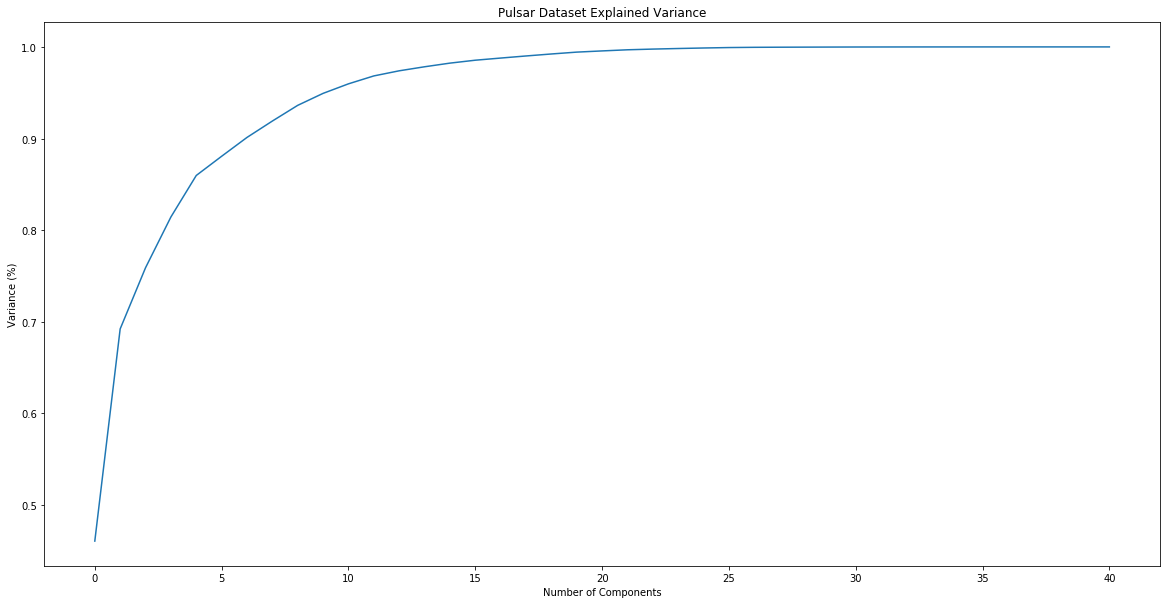

In [23]:
## MULAI PCA

scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(data_pca.iloc[:,:])

#Fitting the PCA algorithm with our Data
pca = PCA().fit(data_rescaled)
#Plotting the Cumulative Summation of the Explained Variance
# plt.figure()
plt.figure(figsize=(20,10)) 

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [24]:
pca = PCA(n_components=41)
dataset = pca.fit_transform(data_rescaled)

df_pca2=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df_pca2

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17,column 18,column 19,column 20,column 21,column 22,column 23,column 24,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34,column 35,column 36,column 37,column 38,column 39,column 40
0,-0.210454,0.109517,0.558613,-0.210847,0.410863,-0.182544,-0.269973,-0.061005,-0.463782,-0.041845,-0.016257,0.219600,0.057659,-0.134752,-0.017798,0.076811,-0.002909,-0.089396,-0.032376,0.006620,0.081705,-0.051989,-0.001722,-0.003106,-0.015040,-0.018264,-0.001643,-0.000989,-0.000149,-0.006964,-0.004533,-0.000210,-0.000157,-5.451047e-07,-0.000445,0.000052,-0.000139,-4.760363e-05,0.000003,-0.000011,-9.558075e-18
1,0.295173,0.354357,0.747835,-0.551986,0.892921,-0.064741,0.035088,0.275928,0.288845,0.207347,-0.411123,-0.394146,0.136762,-0.166930,0.005222,-0.232558,0.092964,-0.091796,-0.014189,0.026604,-0.183462,0.084000,0.043852,-0.001883,0.038448,-0.001640,0.005272,0.002423,0.003426,0.001434,0.002474,-0.000742,-0.000084,-4.248704e-04,0.000462,0.000704,0.000158,-4.170726e-05,0.000036,-0.000007,1.162525e-17
2,1.730388,-0.587896,-0.089366,0.074590,-0.067424,0.029835,-0.051773,-0.014232,0.111595,-0.045301,-0.100270,0.022367,0.014328,0.002643,0.023151,-0.013676,-0.007915,-0.002653,0.009050,0.000282,-0.049915,0.021489,0.005059,0.000722,0.001802,0.003486,0.001287,-0.000146,-0.000418,-0.000488,-0.000203,0.000069,-0.000072,5.659334e-06,0.000053,-0.000078,0.000012,-3.587490e-07,0.000009,0.000003,4.430353e-17
3,-1.010287,-0.469081,-0.215443,0.414567,-0.202224,-0.275664,0.018488,0.132578,0.049882,0.011953,0.045059,0.015433,0.037350,-0.063787,0.047175,0.056267,0.133808,-0.015194,-0.013705,0.011873,-0.003863,-0.003856,-0.072162,-0.012212,0.017498,-0.007879,0.012113,0.000448,-0.000886,0.000483,-0.000328,0.000054,0.000162,-4.609370e-06,0.000486,0.000420,-0.000098,-6.105354e-05,-0.000010,-0.000002,-5.469062e-17
4,-0.999356,-0.337932,-0.496051,-0.226706,0.023366,0.139347,0.131672,-0.138722,0.036212,0.066413,-0.031553,0.017770,0.016677,0.040106,-0.049254,-0.015651,0.009156,0.005715,-0.002939,-0.002169,-0.002592,0.004965,0.010204,-0.001057,0.001141,0.003586,-0.002123,0.000204,0.000300,0.000462,-0.000583,-0.000145,-0.000953,2.989296e-05,-0.000055,-0.000002,0.000041,8.627449e-05,-0.000002,0.000007,-5.792824e-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148511,-0.828475,-0.226192,-0.170238,0.320094,0.390840,-0.140440,-0.092445,0.016003,0.132751,-0.274037,0.017808,0.076274,-0.019840,0.029050,-0.046854,-0.007740,0.002475,-0.028750,-0.003083,0.004940,-0.004040,-0.006299,0.005721,-0.010642,-0.000314,0.000212,-0.000513,-0.000696,-0.000264,-0.002796,-0.003126,-0.000364,-0.000913,-2.476098e-04,-0.000432,-0.000363,-0.000053,-7.250437e-05,0.000015,0.000005,-9.667916e-20
148512,-1.049307,-0.351544,-0.396084,-0.037051,-0.019923,0.134743,0.058345,-0.062198,0.027576,0.074528,-0.027545,0.004143,0.027366,-0.000850,-0.024062,-0.017013,-0.002245,-0.000539,-0.006954,-0.009786,-0.005166,0.004367,0.005394,-0.001198,0.003874,0.004011,-0.000313,0.000200,0.000334,0.000344,-0.000387,-0.000128,-0.000864,2.449742e-05,0.000001,-0.000018,0.000019,6.562754e-05,0.000001,0.000005,-5.535031e-19
148513,-1.005687,-0.286393,-0.491145,-0.172798,0.005716,0.231617,0.079806,-0.155350,0.040089,0.106986,-0.038570,-0.008078,0.062296,0.051919,-0.035847,0.015813,0.006642,-0.001734,0.022999,-0.044650,0.012901,0.016726,0.014883,-0.001526,0.003433,0.000489,-0.003242,-0.000932,-0.002881,-0.010429,0.015689,-0.000320,-0.001084,-1.077986e-04,-0.000460,-0.001058,0.000144,1.671449e-04,-0.000012,-0.000085,-5.755410e-19
148514,-0.721211,-0.169021,0.034085,-0.753098,-0.332777,0.191829,-0.507982,0.133428,-0.089508,0.241641,-0.063088,-0.051173,0.040629,0.009112,-0.003332,-0.066052,0.000119,-0.

In [25]:
dataAttack = df_pca['type_attack']
dataAttack

0         normal
1         normal
2            dos
3         normal
4         normal
           ...  
148511    normal
148512    normal
148513       dos
148514    normal
148515     probe
Name: type_attack, Length: 148516, dtype: object

In [26]:
dataPCA = pd.concat([df_pca2,dataAttack], axis = 1)
dataPCA

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17,column 18,column 19,column 20,column 21,column 22,column 23,column 24,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34,column 35,column 36,column 37,column 38,column 39,column 40,type_attack
0,-0.210454,0.109517,0.558613,-0.210847,0.410863,-0.182544,-0.269973,-0.061005,-0.463782,-0.041845,-0.016257,0.219600,0.057659,-0.134752,-0.017798,0.076811,-0.002909,-0.089396,-0.032376,0.006620,0.081705,-0.051989,-0.001722,-0.003106,-0.015040,-0.018264,-0.001643,-0.000989,-0.000149,-0.006964,-0.004533,-0.000210,-0.000157,-5.451047e-07,-0.000445,0.000052,-0.000139,-4.760363e-05,0.000003,-0.000011,-9.558075e-18,normal
1,0.295173,0.354357,0.747835,-0.551986,0.892921,-0.064741,0.035088,0.275928,0.288845,0.207347,-0.411123,-0.394146,0.136762,-0.166930,0.005222,-0.232558,0.092964,-0.091796,-0.014189,0.026604,-0.183462,0.084000,0.043852,-0.001883,0.038448,-0.001640,0.005272,0.002423,0.003426,0.001434,0.002474,-0.000742,-0.000084,-4.248704e-04,0.000462,0.000704,0.000158,-4.170726e-05,0.000036,-0.000007,1.162525e-17,normal
2,1.730388,-0.587896,-0.089366,0.074590,-0.067424,0.029835,-0.051773,-0.014232,0.111595,-0.045301,-0.100270,0.022367,0.014328,0.002643,0.023151,-0.013676,-0.007915,-0.002653,0.009050,0.000282,-0.049915,0.021489,0.005059,0.000722,0.001802,0.003486,0.001287,-0.000146,-0.000418,-0.000488,-0.000203,0.000069,-0.000072,5.659334e-06,0.000053,-0.000078,0.000012,-3.587490e-07,0.000009,0.000003,4.430353e-17,dos
3,-1.010287,-0.469081,-0.215443,0.414567,-0.202224,-0.275664,0.018488,0.132578,0.049882,0.011953,0.045059,0.015433,0.037350,-0.063787,0.047175,0.056267,0.133808,-0.015194,-0.013705,0.011873,-0.003863,-0.003856,-0.072162,-0.012212,0.017498,-0.007879,0.012113,0.000448,-0.000886,0.000483,-0.000328,0.000054,0.000162,-4.609370e-06,0.000486,0.000420,-0.000098,-6.105354e-05,-0.000010,-0.000002,-5.469062e-17,normal
4,-0.999356,-0.337932,-0.496051,-0.226706,0.023366,0.139347,0.131672,-0.138722,0.036212,0.066413,-0.031553,0.017770,0.016677,0.040106,-0.049254,-0.015651,0.009156,0.005715,-0.002939,-0.002169,-0.002592,0.004965,0.010204,-0.001057,0.001141,0.003586,-0.002123,0.000204,0.000300,0.000462,-0.000583,-0.000145,-0.000953,2.989296e-05,-0.000055,-0.000002,0.000041,8.627449e-05,-0.000002,0.000007,-5.792824e-19,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148511,-0.828475,-0.226192,-0.170238,0.320094,0.390840,-0.140440,-0.092445,0.016003,0.132751,-0.274037,0.017808,0.076274,-0.019840,0.029050,-0.046854,-0.007740,0.002475,-0.028750,-0.003083,0.004940,-0.004040,-0.006299,0.005721,-0.010642,-0.000314,0.000212,-0.000513,-0.000696,-0.000264,-0.002796,-0.003126,-0.000364,-0.000913,-2.476098e-04,-0.000432,-0.000363,-0.000053,-7.250437e-05,0.000015,0.000005,-9.667916e-20,normal
148512,-1.049307,-0.351544,-0.396084,-0.037051,-0.019923,0.134743,0.058345,-0.062198,0.027576,0.074528,-0.027545,0.004143,0.027366,-0.000850,-0.024062,-0.017013,-0.002245,-0.000539,-0.006954,-0.009786,-0.005166,0.004367,0.005394,-0.001198,0.003874,0.004011,-0.000313,0.000200,0.000334,0.000344,-0.000387,-0.000128,-0.000864,2.449742e-05,0.000001,-0.000018,0.000019,6.562754e-05,0.000001,0.000005,-5.535031e-19,normal
148513,-1.005687,-0.286393,-0.491145,-0.172798,0.005716,0.231617,0.079806,-0.155350,0.040089,0.106986,-0.038570,-0.008078,0.062296,0.051919,-0.035847,0.015813,0.006642,-0.001734,0.022999,-0.044650,0.012901,0.016726,0.014883,-0.001526,0.003433,0.000489,-0.003242,-0.000932,-0.002881,-0.010429,0.015689,-0.000320,-0.001084,-1.077986e-04,-0.000460,-0.001058,0.000144,1.671449e-04,-0.000012,-0.000085,-5.755410e-19,dos
148514,-0.721211,-0.169021,0.034085,-0.753098,-0.332777,0.191829,-0.507982,0.133428,-0.089508,0.241641,-0.0

In [27]:
dataPCA2 = dataPCA.loc[dataPCA['type_attack'].isin(['normal','dos'])]
dataPCA2

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17,column 18,column 19,column 20,column 21,column 22,column 23,column 24,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34,column 35,column 36,column 37,column 38,column 39,column 40,type_attack
0,-0.210454,0.109517,0.558613,-0.210847,0.410863,-0.182544,-0.269973,-0.061005,-0.463782,-0.041845,-0.016257,0.219600,0.057659,-0.134752,-0.017798,0.076811,-0.002909,-0.089396,-0.032376,0.006620,0.081705,-0.051989,-0.001722,-0.003106,-0.015040,-0.018264,-0.001643,-0.000989,-0.000149,-0.006964,-0.004533,-0.000210,-0.000157,-5.451047e-07,-0.000445,0.000052,-0.000139,-4.760363e-05,0.000003,-0.000011,-9.558075e-18,normal
1,0.295173,0.354357,0.747835,-0.551986,0.892921,-0.064741,0.035088,0.275928,0.288845,0.207347,-0.411123,-0.394146,0.136762,-0.166930,0.005222,-0.232558,0.092964,-0.091796,-0.014189,0.026604,-0.183462,0.084000,0.043852,-0.001883,0.038448,-0.001640,0.005272,0.002423,0.003426,0.001434,0.002474,-0.000742,-0.000084,-4.248704e-04,0.000462,0.000704,0.000158,-4.170726e-05,0.000036,-0.000007,1.162525e-17,normal
2,1.730388,-0.587896,-0.089366,0.074590,-0.067424,0.029835,-0.051773,-0.014232,0.111595,-0.045301,-0.100270,0.022367,0.014328,0.002643,0.023151,-0.013676,-0.007915,-0.002653,0.009050,0.000282,-0.049915,0.021489,0.005059,0.000722,0.001802,0.003486,0.001287,-0.000146,-0.000418,-0.000488,-0.000203,0.000069,-0.000072,5.659334e-06,0.000053,-0.000078,0.000012,-3.587490e-07,0.000009,0.000003,4.430353e-17,dos
3,-1.010287,-0.469081,-0.215443,0.414567,-0.202224,-0.275664,0.018488,0.132578,0.049882,0.011953,0.045059,0.015433,0.037350,-0.063787,0.047175,0.056267,0.133808,-0.015194,-0.013705,0.011873,-0.003863,-0.003856,-0.072162,-0.012212,0.017498,-0.007879,0.012113,0.000448,-0.000886,0.000483,-0.000328,0.000054,0.000162,-4.609370e-06,0.000486,0.000420,-0.000098,-6.105354e-05,-0.000010,-0.000002,-5.469062e-17,normal
4,-0.999356,-0.337932,-0.496051,-0.226706,0.023366,0.139347,0.131672,-0.138722,0.036212,0.066413,-0.031553,0.017770,0.016677,0.040106,-0.049254,-0.015651,0.009156,0.005715,-0.002939,-0.002169,-0.002592,0.004965,0.010204,-0.001057,0.001141,0.003586,-0.002123,0.000204,0.000300,0.000462,-0.000583,-0.000145,-0.000953,2.989296e-05,-0.000055,-0.000002,0.000041,8.627449e-05,-0.000002,0.000007,-5.792824e-19,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148510,-0.745114,-0.121176,0.638118,-0.628706,-0.408084,0.096112,0.518219,-0.422750,0.203252,0.078130,-0.336635,0.288477,0.142605,-0.110936,0.124525,-0.009756,-0.025701,-0.099058,-0.118726,-0.072920,0.063698,-0.036403,0.031837,0.006437,0.008970,-0.018430,-0.002888,0.001997,0.000816,-0.007001,-0.003137,0.000367,-0.000045,4.486348e-04,0.000576,0.000849,0.000225,1.465744e-04,-0.000046,-0.000002,-2.871573e-20,dos
148511,-0.828475,-0.226192,-0.170238,0.320094,0.390840,-0.140440,-0.092445,0.016003,0.132751,-0.274037,0.017808,0.076274,-0.019840,0.029050,-0.046854,-0.007740,0.002475,-0.028750,-0.003083,0.004940,-0.004040,-0.006299,0.005721,-0.010642,-0.000314,0.000212,-0.000513,-0.000696,-0.000264,-0.002796,-0.003126,-0.000364,-0.000913,-2.476098e-04,-0.000432,-0.000363,-0.000053,-7.250437e-05,0.000015,0.000005,-9.667916e-20,normal
148512,-1.049307,-0.351544,-0.396084,-0.037051,-0.019923,0.134743,0.058345,-0.062198,0.027576,0.074528,-0.027545,0.004143,0.027366,-0.000850,-0.024062,-0.017013,-0.002245,-0.000539,-0.006954,-0.009786,-0.005166,0.004367,0.005394,-0.001198,0.003874,0.004011,-0.000313,0.000200,0.000334,0.000344,-0.000387,-0.000128,-0.000864,2.449742e-05,0.000001,-0.000018,0.000019,6.562754e-05,0.000001,0.000005,-5.535031e-19,normal
148513,-1.005687,-0.286393,-0.491145,-0.172798,0.005716,0.231617,0.079806,-0.155350,0.040089,0.106986,-0.0385

In [0]:
# Convert data training ke CSV
dataPCA2.to_csv('dataPCA2.csv',index=False)

In [0]:
X = dataPCA2.loc[:, :'column 40']
y = dataPCA2.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
# menggunakan model dataBiasa
clf = joblib.load('dataBiasa.pkl')

In [0]:
pred = clf.predict(X_test)

In [32]:
print(f"predict time : {stop - start}s")

predict time : 404.4206235408783s


In [33]:
accuracy_score(y_test,pred)

0.6523305734437289

In [0]:
clf = MLPClassifier(random_state = 5)
scoring = {'accuracy': make_scorer(accuracy_score)}
cv = ShuffleSplit(n_splits=3, test_size=0.3,train_size = 0.7, random_state=5)


start = time.time()

scores = cross_validate(clf, X, y, cv=cv, scoring=scoring, return_train_score=True)

stop = time.time()

In [35]:
print(f"cross validation time : {stop - start}s")

cross validation time : 84.16523146629333s


In [36]:
print(scores)

{'fit_time': array([25.46152711, 29.62652421, 27.35395265]), 'score_time': array([0.18844986, 0.19039488, 0.18637919]), 'test_accuracy': array([0.99826229, 0.99862006, 0.99839006]), 'train_accuracy': array([0.99890481, 0.99902528, 0.99905813])}


In [0]:
### TRAIN ULANG TANPA MENGAMBIL MODEL LAIN

X = dataPCA2.loc[:, :'column 40']
y = dataPCA2.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [39]:
print(f"training time : {stop - start}s")

training time : 25.132624864578247s


In [40]:
joblib.dump(clf, 'modelPCA_41.pkl') 

['modelPCA_41.pkl']

In [41]:
pred = clf.predict(X_test)

accuracy_score(y_test,pred)

0.998262291730553

In [0]:
clf = MLPClassifier(random_state = 5)
scoring = {'accuracy': make_scorer(accuracy_score)}
cv = ShuffleSplit(n_splits=3, test_size=0.3,train_size = 0.7, random_state=5)


start = time.time()

scores = cross_validate(clf, X, y, cv=cv, scoring=scoring, return_train_score=True)

stop = time.time()

In [43]:
print(f"X val time : {stop - start}s")

X val time : 83.2529239654541s


In [44]:
print(scores)

{'fit_time': array([24.85934162, 29.77648568, 26.89520621]), 'score_time': array([0.18868661, 0.18813872, 0.19872117]), 'test_accuracy': array([0.99826229, 0.99862006, 0.99839006]), 'train_accuracy': array([0.99890481, 0.99902528, 0.99905813])}


In [0]:
###### 1,3,5,18,41

#### 18 fitur

X = dataPCA2.loc[:, :'column 17']
y = dataPCA2.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [47]:
print(f"training time : {stop - start}s")

training time : 48.523130655288696s


In [48]:
joblib.dump(clf, 'modelPCA_18.pkl') 

['modelPCA_18.pkl']

In [49]:
pred = clf.predict(X_test)

accuracy_score(y_test,pred)

0.9965756925278545

In [0]:
clf = MLPClassifier(random_state = 5)
scoring = {'accuracy': make_scorer(accuracy_score)}
cv = ShuffleSplit(n_splits=3, test_size=0.3,train_size = 0.7, random_state=5)


start = time.time()

scores = cross_validate(clf, X, y, cv=cv, scoring=scoring, return_train_score=True)

stop = time.time()

In [51]:
print(f"X val time : {stop - start}s")

X val time : 142.9196331501007s


In [52]:
print(scores)

{'fit_time': array([48.43742418, 49.35169196, 43.46218276]), 'score_time': array([0.1825459 , 0.18449235, 0.18639898]), 'test_accuracy': array([0.99657569, 0.9969079 , 0.99642237]), 'train_accuracy': array([0.99703202, 0.99731677, 0.99694441])}


In [0]:
#### 5 fitur

X = dataPCA2.loc[:, :'column 4']
y = dataPCA2.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [54]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [55]:
print(f"training time : {stop - start}s")

training time : 94.59424686431885s


In [56]:
#### SAVE model
joblib.dump(clf, 'modelPCA_5.pkl') 

['modelPCA_5.pkl']

In [57]:
pred = clf.predict(X_test)

accuracy_score(y_test,pred)

0.987606051313503

In [0]:
clf = MLPClassifier(random_state = 5)
scoring = {'accuracy': make_scorer(accuracy_score)}
cv = ShuffleSplit(n_splits=3, test_size=0.3,train_size = 0.7, random_state=5)


In [59]:
start = time.time()

scores = cross_validate(clf, X, y, cv=cv, scoring=scoring, return_train_score=True)

stop = time.time()

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [60]:
print(f"X val time : {stop - start}s")

X val time : 270.6847085952759s


In [61]:
print(scores)

{'fit_time': array([94.62523341, 82.33732462, 92.04099655]), 'score_time': array([0.1880877 , 0.1824398 , 0.18933606]), 'test_accuracy': array([0.98760605, 0.98709496, 0.98630277]), 'train_accuracy': array([0.9875805 , 0.98754764, 0.98737241])}


In [0]:
#### 3 fitur

X = dataPCA2.loc[:, :'column 2']
y = dataPCA2.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [63]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [64]:
print(f"training time : {stop - start}s")

training time : 79.12559294700623s


In [65]:
#### SAVE model

joblib.dump(clf, 'modelPCA_3.pkl') 

['modelPCA_3.pkl']

In [66]:
pred = clf.predict(X_test)

accuracy_score(y_test,pred)

0.9704845139527752

In [0]:
clf = MLPClassifier(random_state = 5)
scoring = {'accuracy': make_scorer(accuracy_score)}
cv = ShuffleSplit(n_splits=3, test_size=0.3,train_size = 0.7, random_state=5)

In [68]:
start = time.time()

scores = cross_validate(clf, X, y, cv=cv, scoring=scoring, return_train_score=True)

stop = time.time()

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [69]:
print(f"X val time : {stop - start}s")

X val time : 238.92006134986877s


In [70]:
print(scores)

{'fit_time': array([80.09592628, 78.63339472, 78.63059974]), 'score_time': array([0.17278862, 0.17152023, 0.17317224]), 'test_accuracy': array([0.97048451, 0.96606358, 0.96683022]), 'train_accuracy': array([0.97052832, 0.96635563, 0.96921409])}


In [0]:
#### 1 fitur

X = dataPCA2.loc[:, :'column 0']
y = dataPCA2.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [73]:
print(f"training time : {stop - start}s")

training time : 42.969305753707886s


In [74]:
### SAVE MODEL

joblib.dump(clf, 'modelPCA_1.pkl') 

['modelPCA_1.pkl']

In [75]:
pred = clf.predict(X_test)

accuracy_score(y_test,pred)

0.9432689359092303

In [0]:
clf = MLPClassifier(random_state = 5)
scoring = {'accuracy': make_scorer(accuracy_score)}
cv = ShuffleSplit(n_splits=3, test_size=0.3,train_size = 0.7, random_state=5)

In [0]:
start = time.time()

scores = cross_validate(clf, X, y, cv=cv, scoring=scoring, return_train_score=True)

stop = time.time()

In [78]:
print(f"X val time : {stop - start}s")

X val time : 132.62841176986694s


In [79]:
print(scores)

{'fit_time': array([43.2632463 , 60.74832034, 26.65770793]), 'score_time': array([0.23648596, 0.23588824, 0.2029283 ]), 'test_accuracy': array([0.94326894, 0.9436267 , 0.94240008]), 'train_accuracy': array([0.94355369, 0.94342226, 0.943937  ])}


# Data Log tanpa PCA

In [0]:
df_log = pd.read_excel('/content/drive/My Drive/Tugas Akhir a.k.a SKRIPSI/Tugas Akhir - UPDATE JANUARI 2020/dataset/datatest_fromsnortlog.xlsx')

In [0]:
# dicitionary untuk merubah tipe serangan menjadi lebih umum seperti Normal, DoS, Probe, U2R, dan R2L

attack_dict={ #DOS
    'back' : 'dos',
    'land' : 'dos',
    'neptune' : 'dos',
    'pod' : 'dos',
    'smurf' : 'dos',
    'teardrop' : 'dos',
    'apache2' : 'dos',
    'udpstorm' : 'dos',
    'processtable' : 'dos',
    'worm' : 'dos',
    'mailbomb' : 'dos',
    
    #probe
    'satan' : 'probe',
    'ipsweep' : 'probe',
    'nmap' : 'probe',
    'portsweep' : 'probe',
    'mscan' : 'probe',
    'saint' : 'probe',
    
    #R2L
    'guess_passwd' : 'r2l',
    'ftp_write' : 'r2l',
    'imap' : 'r2l',
    'phf' : 'r2l',
    'multihop' : 'r2l',
    'warezmaster' : 'r2l',
    'warezclient' : 'r2l',
    'spy' : 'r2l',
    'xlock' : 'r2l',
    'xsnoop': 'r2l',
    'snmpguess' : 'r2l',
    'snmpgetattack' : 'r2l',
    'httptunnel' : 'r2l',
    'sendmail' : 'r2l',
    'named' : 'r2l',
    
    #U2R
    'buffer_overflow' : 'u2r',
    'loadmodule' : 'u2r',
    'rootkit' : 'u2r',
    'perl' : 'u2r',
    'sqlattack' : 'u2r',
    'xterm' : 'u2r',
    'ps' : 'u2r'
}

protocol_dict ={
    "udp" : 0,
    "tcp" : 1,
    "icmp": 2
}

service_dict={
    "Z39_50" : 0,
    "X11" : 1,
    "whois" : 2,
    "vmnet" : 3,
    "uucp_path" : 4,
    "uucp" : 5,
    "urp_i" : 6,
    "urh_i" : 7,
    "time" : 8,
    "tim_i" : 9,
    "tftp_u" : 10,
    "telnet" : 11,
    "systat" : 12,
    "supdup" : 13,
    "sunrpc" : 14,
    "ssh" : 15,
    "sql_net" : 16,
    "smtp" : 17,
    "shell" : 18,
    "rje" : 19,
    "remote_job" : 20,
    "red_i" : 21,
    "private" : 22,
    "printer" : 23,
    "pop_3" : 24,
    "pop_2" : 25,
    "pm_dump" : 26,
    "other" : 27,
    "ntp_u" : 28,
    "nntp" : 29,
    "nnsp" : 30,
    "netstat" : 31,
    "netbios_ssn" : 32,
    "netbios_ns" : 33,
    "netbios_dgm" : 34,
    "name" : 35,
    "mtp" : 36,
    "login" : 37,
    "link" : 38,
    "ldap" : 39,
    "kshell" : 40,
    "klogin" : 41,
    "iso_tsap" : 42,
    "IRC" : 43,
    "imap4" : 44,
    "http_8001" : 45,
    "http_443" : 46,
    "http_2784" : 47,
    "http" : 48,
    "hostnames" : 49,
    "harvest" : 50,
    "gopher" : 51,
    "ftp_data" : 52,
    "ftp" : 53,
    "finger" :  54,
    "exec" : 55,
    "efs" : 56,
    "ecr_i" : 57,
    "eco_i" : 58,
    "echo" : 59,
    "domain_u" : 60,
    "domain" : 61,
    "discard" : 62,
    "daytime" : 63,
    "ctf" : 64,
    "csnet_ns" : 65,
    "courier" : 66,
    "bgp" : 67,
    "auth" : 68,
    "aol" : 69

}

flag_dict={
    "SH" : 0,
    "SF" : 1,
    "S3" : 2,
    "S2" : 3,
    "S1" : 4,
    "S0" : 5,
    "RSTR" : 6,
    "RSTOS0" : 7,
    "RSTO" : 8,
    "REJ" : 9,
    "OTH" : 10

}



df_log.replace(flag_dict, inplace = True)
df_log.replace(service_dict, inplace = True)
df_log.replace(protocol_dict, inplace = True)
df_log.replace(attack_dict, inplace = True)

In [82]:
df_log

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,num_packet,type_attack
0,0,2,48,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,299,20,0.0,0.0,1,1,0.07,0.06,0.00,255,20,0.08,0.07,0.00,0.00,0.0,0.00,1.0,1.0,20,dos
1,0,1,48,9,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,1,1,1.00,0.00,0.00,3,250,1.00,0.00,0.33,0.12,0.0,0.00,1.0,1.0,21,normal
2,0,2,4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,260,6,1.0,1.0,0,0,0.02,0.06,0.00,255,11,0.04,0.08,0.00,0.00,1.0,1.00,0.0,0.0,19,dos
3,0,1,48,9,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,1,1,1.00,0.00,0.00,3,250,1.00,0.00,0.33,0.12,0.0,0.00,1.0,1.0,21,normal
4,0,2,22,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,127,17,1.0,1.0,0,0,0.13,0.07,0.00,255,14,0.05,0.07,0.00,0.00,1.0,1.00,0.0,0.0,21,dos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,1,60,1,43,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,175,175,0.0,0.0,0,0,1.00,0.00,0.00,255,254,1.00,0.01,0.00,0.00,0.0,0.00,0.0,0.0,18,normal
96,0,2,14,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,145,16,1.0,1.0,0,0,0.11,0.06,0.00,255,10,0.04,0.06,0.00,0.00,1.0,1.00,0.0,0.0,19,dos
97,0,1,48,1,342,1035,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,6,0.0,0.0,0,0,1.00,0.00,0.33,61,255,1.00,0.00,0.02,0.02,0.0,0.00,0.0,0.0,21,normal
98,0,1,48,1,204,502,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,3,0.0,0.0,0,0,1.00,0.00,1.00,4,255,1.00,0.00,0.25,0.05,0.0,0.01,0.0,0.0,21,normal


In [0]:
X = df_log.loc[:, :'dst_host_srv_rerror_rate']
y = df_log.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
clf = joblib.load('dataBiasa.pkl')

In [0]:
pred = clf.predict(X_test)

In [86]:
accuracy_score(y_test,pred)

0.9666666666666667

In [0]:
clf = MLPClassifier(random_state = 5)
scoring = {'accuracy': make_scorer(accuracy_score)}
cv = ShuffleSplit(n_splits=3, test_size=0.3,train_size = 0.7, random_state=5)

In [0]:
start = time.time()

scores = cross_validate(clf, X, y, cv=cv, scoring=scoring, return_train_score=True)

stop = time.time()

In [89]:
print(f"X validation time : {stop - start}s")

X validation time : 0.19473552703857422s


In [90]:
print(scores)

{'fit_time': array([0.07900095, 0.06084609, 0.03936505]), 'score_time': array([0.00157404, 0.00164151, 0.00159216]), 'test_accuracy': array([0.96666667, 0.86666667, 0.76666667]), 'train_accuracy': array([1., 1., 1.])}


In [0]:
#### PAKAI MODEL41 PCA
X = df_log.loc[:, :'dst_host_srv_rerror_rate']
y = df_log.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
clf = joblib.load('modelPCA_41.pkl')

In [0]:
pred = clf.predict(X_test)

In [94]:
accuracy_score(y_test,pred)

0.43333333333333335

In [0]:
clf = MLPClassifier(random_state = 5)
scoring = {'accuracy': make_scorer(accuracy_score)}
cv = ShuffleSplit(n_splits=3, test_size=0.3,train_size = 0.7, random_state=5)

In [0]:
start = time.time()

scores = cross_validate(clf, X, y, cv=cv, scoring=scoring, return_train_score=True)

stop = time.time()

In [97]:
print(f"X validation time : {stop - start}s")

X validation time : 0.211639404296875s


In [98]:
print(scores)

{'fit_time': array([0.07929873, 0.07198524, 0.04454279]), 'score_time': array([0.00181961, 0.00177646, 0.00193143]), 'test_accuracy': array([0.96666667, 0.86666667, 0.76666667]), 'train_accuracy': array([1., 1., 1.])}


In [0]:
#### PAKAI MODEL BIASA
X = df_log.loc[:, :'dst_host_srv_rerror_rate']
y = df_log.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
clf = joblib.load('dataBiasa.pkl')

In [101]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9666666666666667

In [0]:
clf = MLPClassifier(random_state = 5)
scoring = {'accuracy': make_scorer(accuracy_score)}
cv = ShuffleSplit(n_splits=3, test_size=0.3,train_size = 0.7, random_state=5)

In [0]:
start = time.time()

scores = cross_validate(clf, X, y, cv=cv, scoring=scoring, return_train_score=True)

stop = time.time()

In [104]:
print(f"X validation time : {stop - start}s")

X validation time : 0.21634268760681152s


In [105]:
print(scores)

{'fit_time': array([0.0894568 , 0.06312323, 0.04719996]), 'score_time': array([0.00155759, 0.00163603, 0.0017879 ]), 'test_accuracy': array([0.96666667, 0.86666667, 0.76666667]), 'train_accuracy': array([1., 1., 1.])}


In [106]:
### Coba semua data log sbg y_test
df_log

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,num_packet,type_attack
0,0,2,48,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,299,20,0.0,0.0,1,1,0.07,0.06,0.00,255,20,0.08,0.07,0.00,0.00,0.0,0.00,1.0,1.0,20,dos
1,0,1,48,9,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,1,1,1.00,0.00,0.00,3,250,1.00,0.00,0.33,0.12,0.0,0.00,1.0,1.0,21,normal
2,0,2,4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,260,6,1.0,1.0,0,0,0.02,0.06,0.00,255,11,0.04,0.08,0.00,0.00,1.0,1.00,0.0,0.0,19,dos
3,0,1,48,9,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,1,1,1.00,0.00,0.00,3,250,1.00,0.00,0.33,0.12,0.0,0.00,1.0,1.0,21,normal
4,0,2,22,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,127,17,1.0,1.0,0,0,0.13,0.07,0.00,255,14,0.05,0.07,0.00,0.00,1.0,1.00,0.0,0.0,21,dos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,1,60,1,43,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,175,175,0.0,0.0,0,0,1.00,0.00,0.00,255,254,1.00,0.01,0.00,0.00,0.0,0.00,0.0,0.0,18,normal
96,0,2,14,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,145,16,1.0,1.0,0,0,0.11,0.06,0.00,255,10,0.04,0.06,0.00,0.00,1.0,1.00,0.0,0.0,19,dos
97,0,1,48,1,342,1035,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,6,0.0,0.0,0,0,1.00,0.00,0.33,61,255,1.00,0.00,0.02,0.02,0.0,0.00,0.0,0.0,21,normal
98,0,1,48,1,204,502,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,3,0.0,0.0,0,0,1.00,0.00,1.00,4,255,1.00,0.00,0.25,0.05,0.0,0.01,0.0,0.0,21,normal


In [0]:
clf = joblib.load('dataBiasa.pkl')

In [108]:
pred = clf.predict(X)
accuracy_score(y,pred)

0.99

In [0]:
clf = MLPClassifier(random_state = 5)
scoring = {'accuracy': make_scorer(accuracy_score)}
cv = ShuffleSplit(n_splits=3, test_size=0.3,train_size = 0.7, random_state=5)

In [0]:
start = time.time()

scores = cross_validate(clf, X, y, cv=cv, scoring=scoring, return_train_score=True)

stop = time.time()

In [111]:
print(f"X validation time : {stop - start}s")

X validation time : 0.19498276710510254s


In [112]:
print(scores)

{'fit_time': array([0.07613969, 0.06145382, 0.04154277]), 'score_time': array([0.00171018, 0.00164676, 0.00162554]), 'test_accuracy': array([0.96666667, 0.86666667, 0.76666667]), 'train_accuracy': array([1., 1., 1.])}


In [0]:
### Langsung X dan y pakai model41

clf = joblib.load('modelPCA_41.pkl')

In [114]:
pred = clf.predict(X)
accuracy_score(y,pred)

0.43

In [0]:
clf = MLPClassifier(random_state = 5)
scoring = {'accuracy': make_scorer(accuracy_score)}
cv = ShuffleSplit(n_splits=3, test_size=0.3,train_size = 0.7, random_state=5)

In [0]:
start = time.time()

scores = cross_validate(clf, X, y, cv=cv, scoring=scoring, return_train_score=True)

stop = time.time()

In [117]:
print(f"X validation time : {stop - start}s")

X validation time : 0.22864627838134766s


In [118]:
print(scores)

{'fit_time': array([0.08415532, 0.06582379, 0.06315899]), 'score_time': array([0.00161481, 0.00152516, 0.0017879 ]), 'test_accuracy': array([0.96666667, 0.86666667, 0.76666667]), 'train_accuracy': array([1., 1., 1.])}


# View Data

In [0]:
df_log = pd.read_excel('/content/drive/My Drive/Tugas Akhir a.k.a SKRIPSI/Tugas Akhir - UPDATE JANUARI 2020/dataset/datatest_fromsnortlog.xlsx')

In [0]:
# dicitionary untuk merubah tipe serangan menjadi lebih umum seperti Normal, DoS, Probe, U2R, dan R2L

attack_dict={ #DOS
    'back' : 'dos',
    'land' : 'dos',
    'neptune' : 'dos',
    'pod' : 'dos',
    'smurf' : 'dos',
    'teardrop' : 'dos',
    'apache2' : 'dos',
    'udpstorm' : 'dos',
    'processtable' : 'dos',
    'worm' : 'dos',
    'mailbomb' : 'dos',
    
    #probe
    'satan' : 'probe',
    'ipsweep' : 'probe',
    'nmap' : 'probe',
    'portsweep' : 'probe',
    'mscan' : 'probe',
    'saint' : 'probe',
    
    #R2L
    'guess_passwd' : 'r2l',
    'ftp_write' : 'r2l',
    'imap' : 'r2l',
    'phf' : 'r2l',
    'multihop' : 'r2l',
    'warezmaster' : 'r2l',
    'warezclient' : 'r2l',
    'spy' : 'r2l',
    'xlock' : 'r2l',
    'xsnoop': 'r2l',
    'snmpguess' : 'r2l',
    'snmpgetattack' : 'r2l',
    'httptunnel' : 'r2l',
    'sendmail' : 'r2l',
    'named' : 'r2l',
    
    #U2R
    'buffer_overflow' : 'u2r',
    'loadmodule' : 'u2r',
    'rootkit' : 'u2r',
    'perl' : 'u2r',
    'sqlattack' : 'u2r',
    'xterm' : 'u2r',
    'ps' : 'u2r'
}

protocol_dict ={
    "udp" : 0,
    "tcp" : 1,
    "icmp": 2
}

service_dict={
    "Z39_50" : 0,
    "X11" : 1,
    "whois" : 2,
    "vmnet" : 3,
    "uucp_path" : 4,
    "uucp" : 5,
    "urp_i" : 6,
    "urh_i" : 7,
    "time" : 8,
    "tim_i" : 9,
    "tftp_u" : 10,
    "telnet" : 11,
    "systat" : 12,
    "supdup" : 13,
    "sunrpc" : 14,
    "ssh" : 15,
    "sql_net" : 16,
    "smtp" : 17,
    "shell" : 18,
    "rje" : 19,
    "remote_job" : 20,
    "red_i" : 21,
    "private" : 22,
    "printer" : 23,
    "pop_3" : 24,
    "pop_2" : 25,
    "pm_dump" : 26,
    "other" : 27,
    "ntp_u" : 28,
    "nntp" : 29,
    "nnsp" : 30,
    "netstat" : 31,
    "netbios_ssn" : 32,
    "netbios_ns" : 33,
    "netbios_dgm" : 34,
    "name" : 35,
    "mtp" : 36,
    "login" : 37,
    "link" : 38,
    "ldap" : 39,
    "kshell" : 40,
    "klogin" : 41,
    "iso_tsap" : 42,
    "IRC" : 43,
    "imap4" : 44,
    "http_8001" : 45,
    "http_443" : 46,
    "http_2784" : 47,
    "http" : 48,
    "hostnames" : 49,
    "harvest" : 50,
    "gopher" : 51,
    "ftp_data" : 52,
    "ftp" : 53,
    "finger" :  54,
    "exec" : 55,
    "efs" : 56,
    "ecr_i" : 57,
    "eco_i" : 58,
    "echo" : 59,
    "domain_u" : 60,
    "domain" : 61,
    "discard" : 62,
    "daytime" : 63,
    "ctf" : 64,
    "csnet_ns" : 65,
    "courier" : 66,
    "bgp" : 67,
    "auth" : 68,
    "aol" : 69

}

flag_dict={
    "SH" : 0,
    "SF" : 1,
    "S3" : 2,
    "S2" : 3,
    "S1" : 4,
    "S0" : 5,
    "RSTR" : 6,
    "RSTOS0" : 7,
    "RSTO" : 8,
    "REJ" : 9,
    "OTH" : 10

}



df_log.replace(flag_dict, inplace = True)
df_log.replace(service_dict, inplace = True)
df_log.replace(protocol_dict, inplace = True)
df_log.replace(attack_dict, inplace = True)